In [4]:
import torch 
import torch.optim as optim 
import torch.nn as nn 
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from models import NN
from compute_score import compute_score

DEVICE="cpu"

In [5]:
transform = Compose([
                    ToTensor(),
                    Normalize((0.1307,), (0.3081,))
                    ])

trainset = MNIST(root="../../../Datasets", train=True, download=False, transform=transform)
trainloader = DataLoader(trainset, batch_size=256, shuffle=True)

class_to_data = {i:[] for i in range(10)}

for data, label in trainset:
    class_to_data[label].append(data)

for class_label in class_to_data:
    class_to_data[class_label] = torch.stack(class_to_data[class_label]).to(DEVICE)

# Hidden Layer of Size 10

**** model 0 ****


Epoch : 10 : loss 124.14096012711525: 100%|██████████| 10/10 [00:46<00:00,  4.62s/it]


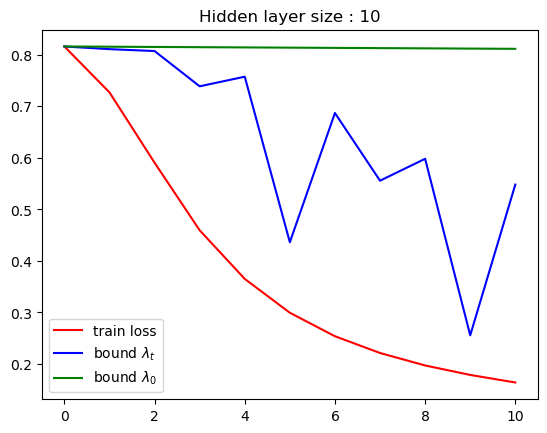

In [ ]:
all_losses_10 = []
all_borne_infinie_10 = []
all_borne_finie_10 = []

for i in range(1):
    print(f"**** model {i} ****")

    model = NN(hidden_dim=10).to(DEVICE)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5)

    records_loss = []
    records_borne_timesteps = []
    records_borne_lambda0 = []
    records_loss_exp = []

    lambda_min_init, classes = compute_score(model, trainset, device=DEVICE)

    full_score_init = 0
    score_init = []

    for c in classes:
        score_c = torch.sum((1 - F.softmax(model(class_to_data[c]), dim=1)[:,c])**2)
        full_score_init+=score_c
    full_score_init/=len(trainset)
    borne_init = full_score_init

    records_borne_timesteps.append(borne_init.item())
    records_borne_lambda0.append(borne_init.item())
    records_loss_exp.append(borne_init.item())
    
    pbar = trange(10)
    for epoch in pbar:
        model.train()

        running_loss = 0
        for i, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            preds = model(inputs)
            loss = criterion(preds, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        pbar.set_description(f"Epoch : {epoch+1} : loss {running_loss}")

        model.eval()
        lambda_min, classes = compute_score(model, trainset, device=DEVICE)

        full_score = 0
        borne_timesteps = 0
        borne_lambda0 = 0

        for c in classes:
            score_c = sum((1 - F.softmax(model(class_to_data[c]), dim=1)[:,c])**2)
            full_score+=score_c

        borne_timesteps = np.exp(-lambda_min*(epoch+1))*full_score_init.detach()
        borne_lambda0 = np.exp(-lambda_min_init*(epoch+1))*full_score_init.detach()

        full_score = full_score.item()/len(trainset)
        records_borne_timesteps.append(borne_timesteps.item())
        records_borne_lambda0.append(borne_lambda0.item())
        records_loss_exp.append(full_score)
        records_loss.append(running_loss)

    all_losses_10.append(records_loss_exp)
    all_borne_finie_10.append(records_borne_timesteps)
    all_borne_infinie_10.append(records_borne_lambda0)

plt.plot(np.mean(all_losses_10, axis=0), c="red", label="train loss")
plt.plot(np.mean(all_borne_finie_10, axis=0), c="blue", label="bound $\lambda_t$")
plt.plot(np.mean(all_borne_infinie_10, axis=0), c="green", label="bound $\lambda_0$")
plt.title('Hidden layer size : 10')
plt.legend()

# Hidden Layer of Size 100

**** model 0 ****


Epoch : 10 : loss 125.52888682484627: 100%|██████████| 10/10 [00:51<00:00,  5.19s/it]


**** model 1 ****


Epoch : 10 : loss 124.12467876076698: 100%|██████████| 10/10 [00:51<00:00,  5.19s/it]


**** model 2 ****


Epoch : 10 : loss 124.83307272195816: 100%|██████████| 10/10 [00:50<00:00,  5.08s/it]


**** model 3 ****


Epoch : 10 : loss 124.68126156926155: 100%|██████████| 10/10 [00:49<00:00,  4.96s/it]


**** model 4 ****


Epoch : 10 : loss 123.70548552274704: 100%|██████████| 10/10 [00:50<00:00,  5.04s/it]


**** model 5 ****


Epoch : 10 : loss 123.74906834959984: 100%|██████████| 10/10 [00:50<00:00,  5.01s/it]


**** model 6 ****


Epoch : 10 : loss 123.93422701954842: 100%|██████████| 10/10 [00:49<00:00,  4.99s/it]


**** model 7 ****


Epoch : 10 : loss 123.04775080084801: 100%|██████████| 10/10 [00:50<00:00,  5.02s/it]


**** model 8 ****


Epoch : 10 : loss 125.35270190238953: 100%|██████████| 10/10 [00:49<00:00,  4.96s/it]


**** model 9 ****


Epoch : 10 : loss 123.00778847932816: 100%|██████████| 10/10 [00:51<00:00,  5.11s/it]


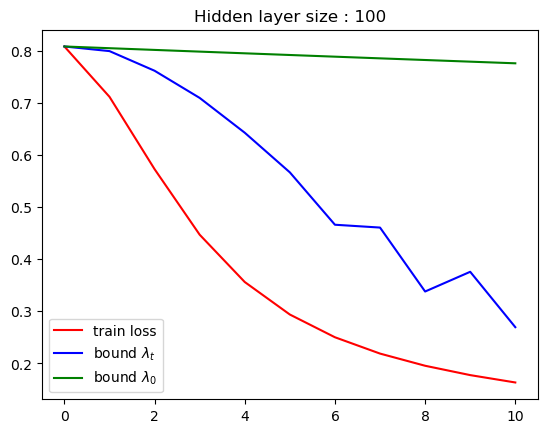

In [9]:
all_losses_100 = []
all_borne_infinie_100 = []
all_borne_finie_100 = []

for i in range(10):
    print(f"**** model {i} ****")

    model = NN(hidden_dim=100).to(DEVICE)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5)

    records_loss = []
    records_borne_timesteps = []
    records_borne_lambda0 = []
    records_loss_exp = []

    lambda_min_init, classes = compute_score(model, trainset, device=DEVICE)

    full_score_init = 0
    score_init = []

    for c in classes:
        score_c = torch.sum((1 - F.softmax(model(class_to_data[c]), dim=1)[:,c])**2)
        full_score_init+=score_c
    full_score_init/=len(trainset)
    borne_init = full_score_init

    records_borne_timesteps.append(borne_init.item())
    records_borne_lambda0.append(borne_init.item())
    records_loss_exp.append(borne_init.item())
    
    pbar = trange(10)
    for epoch in pbar:
        model.train()

        running_loss = 0
        for i, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            preds = model(inputs)
            loss = criterion(preds, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        pbar.set_description(f"Epoch : {epoch+1} : loss {running_loss}")

        model.eval()
        lambda_min, classes = compute_score(model, trainset, device=DEVICE)

        full_score = 0
        borne_timesteps = 0
        borne_lambda0 = 0

        for c in classes:
            score_c = sum((1 - F.softmax(model(class_to_data[c]), dim=1)[:,c])**2)
            full_score+=score_c

        borne_timesteps = np.exp(-lambda_min*(epoch+1))*full_score_init.detach()
        borne_lambda0 = np.exp(-lambda_min_init*(epoch+1))*full_score_init.detach()

        full_score = full_score.item()/len(trainset)
        records_borne_timesteps.append(borne_timesteps.item())
        records_borne_lambda0.append(borne_lambda0.item())
        records_loss_exp.append(full_score)
        records_loss.append(running_loss)

    all_losses_100.append(records_loss_exp)
    all_borne_finie_100.append(records_borne_timesteps)
    all_borne_infinie_100.append(records_borne_lambda0)

plt.plot(np.mean(all_losses_100, axis=0), c="red", label="train loss")
plt.plot(np.mean(all_borne_finie_100, axis=0), c="blue", label="bound $\lambda_t$")
plt.plot(np.mean(all_borne_infinie_100, axis=0), c="green", label="bound $\lambda_0$")
plt.title('Hidden layer size : 100')
plt.legend()

# Hidden Layer of Size 1000

**** model 0 ****


Epoch : 10 : loss 70.18973058462143: 100%|██████████| 10/10 [01:08<00:00,  6.90s/it]


**** model 1 ****


Epoch : 10 : loss 70.25572492182255: 100%|██████████| 10/10 [01:12<00:00,  7.30s/it]


**** model 2 ****


Epoch : 10 : loss 70.07203647494316: 100%|██████████| 10/10 [01:15<00:00,  7.53s/it]


**** model 3 ****


Epoch : 10 : loss 70.3100125938654: 100%|██████████| 10/10 [01:15<00:00,  7.52s/it]


**** model 4 ****


Epoch : 10 : loss 70.50293037295341: 100%|██████████| 10/10 [01:17<00:00,  7.74s/it]


**** model 5 ****


Epoch : 10 : loss 70.50981636345387: 100%|██████████| 10/10 [01:15<00:00,  7.58s/it]


**** model 6 ****


Epoch : 10 : loss 70.44601958990097: 100%|██████████| 10/10 [01:14<00:00,  7.46s/it]


**** model 7 ****


Epoch : 10 : loss 70.54024827480316: 100%|██████████| 10/10 [01:14<00:00,  7.43s/it]


**** model 8 ****


Epoch : 10 : loss 70.36097548902035: 100%|██████████| 10/10 [01:13<00:00,  7.39s/it]


**** model 9 ****


Epoch : 10 : loss 70.18261606991291: 100%|██████████| 10/10 [01:16<00:00,  7.64s/it]


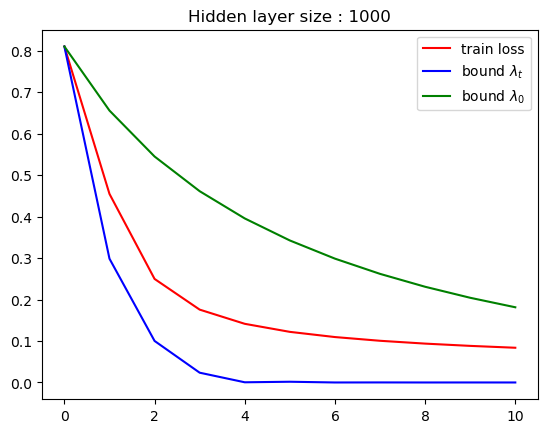

In [8]:
all_losses_1000 = []
all_borne_infinie_1000 = []
all_borne_finie_1000 = []

for i in range(10):
    print(f"**** model {i} ****")

    model = NN(hidden_dim=1000).to(DEVICE)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5)

    records_loss = []
    records_borne_timesteps = []
    records_borne_lambda0 = []
    records_loss_exp = []

    lambda_min_init, classes = compute_score(model, trainset, device=DEVICE)

    full_score_init = 0
    score_init = []

    for c in classes:
        score_c = torch.sum((1 - F.softmax(model(class_to_data[c]), dim=1)[:,c])**2)
        full_score_init+=score_c
    full_score_init/=len(trainset)
    borne_init = full_score_init

    records_borne_timesteps.append(borne_init.item())
    records_borne_lambda0.append(borne_init.item())
    records_loss_exp.append(borne_init.item())
    
    pbar = trange(10)
    for epoch in pbar:
        model.train()

        running_loss = 0
        for i, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            preds = model(inputs)
            loss = criterion(preds, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        pbar.set_description(f"Epoch : {epoch+1} : loss {running_loss}")

        model.eval()
        lambda_min, classes = compute_score(model, trainset, device=DEVICE)

        full_score = 0
        borne_timesteps = 0
        borne_lambda0 = 0

        for c in classes:
            score_c = sum((1 - F.softmax(model(class_to_data[c]), dim=1)[:,c])**2)
            full_score+=score_c

        borne_timesteps = np.exp(-lambda_min*(epoch+1))*full_score_init.detach()
        borne_lambda0 = np.exp(-lambda_min_init*(epoch+1))*full_score_init.detach()

        full_score = full_score.item()/len(trainset)
        records_borne_timesteps.append(borne_timesteps.item())
        records_borne_lambda0.append(borne_lambda0.item())
        records_loss_exp.append(full_score)
        records_loss.append(running_loss)

    all_losses_1000.append(records_loss_exp)
    all_borne_finie_1000.append(records_borne_timesteps)
    all_borne_infinie_1000.append(records_borne_lambda0)

plt.plot(np.mean(all_losses_1000, axis=0), c="red", label="train loss")
plt.plot(np.mean(all_borne_finie_1000, axis=0), c="blue", label="bound $\lambda_t$")
plt.plot(np.mean(all_borne_infinie_1000, axis=0), c="green", label="bound $\lambda_0$")
plt.title('Hidden layer size : 1000')
plt.legend()